TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline



1) Collect / Load the Dataset


In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2) See the Data Structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


STEP 4: Identify Target Variable,
Target = Survived,
This is what you will predict.

STEP 5: Understand Each Column,
You understand:
What each column means in real life,
Whether it can affect survival,
👉 Decide which columns are useful.

STEP 6: Find Missing Values,
You check:
Which columns have missing data,
How many values are missing,

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

STEP 7: Remove Unnecessary Columns

In [5]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


STEP 8: Handle Missing Values

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

#This form will not work in future then-
# df.fillna({'Age': df['Age'].mean()}, inplace=True)


STEP 9: Identify Categorical Columns

Sex

Embarked

👉 ML cannot understand text.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


STEP 10: Convert Categorical Data to Numeric

Male/Female → 0/1

Embarked → numbers

👉 Data becomes machine-readable.

In [9]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()
df['Sex']=lbl_encoder.fit_transform(df['Sex'])

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df[['Embarked']]).toarray()
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoder_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


STEP 11: Check for Outliers

In [10]:
Q1 = df['Age'].quantile(0.25)
Q3= df['Age'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

13.0


In [11]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [12]:
Outliers=df[(df['Age']< lower_fence)|(df['Age']< higher_fence)]
Outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


Visualization & EDA


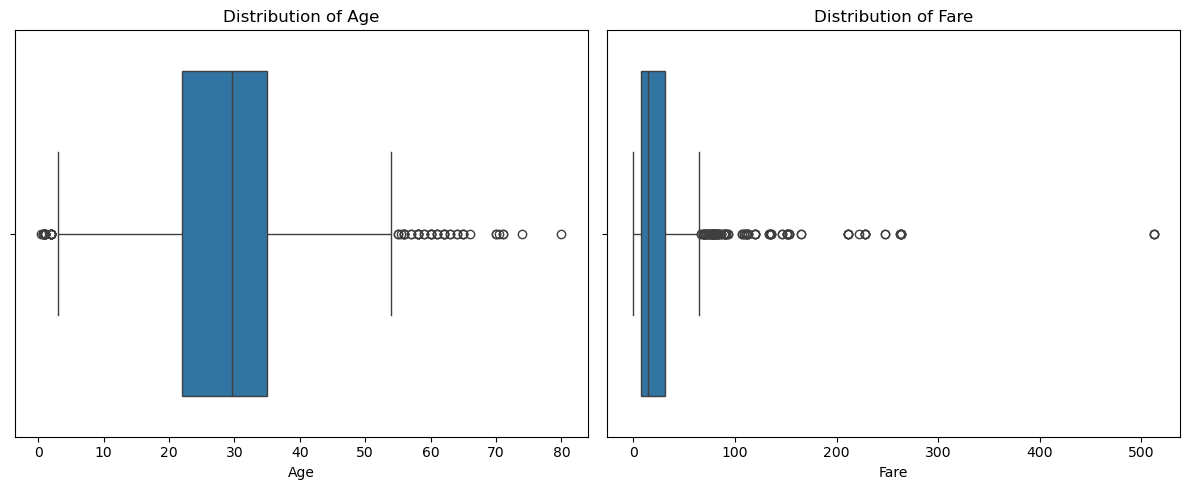

In [13]:
#This is used to show graph in same cell.
# 1. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2. Assign each plot to an axis using the 'ax' parameter
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Distribution of Age')

sns.boxplot(data=df, x='Fare', ax=axes[1])
axes[1].set_title('Distribution of Fare')

# 3. Clean up the layout
plt.tight_layout()
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB


In [15]:
df['Age']=df['Age'].astype(int)
df['Embarked']=df['Age'].astype(int)
df['Fare']=df['Fare'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int32
 7   Embarked  891 non-null    int32
dtypes: int32(4), int64(4)
memory usage: 41.9 KB


Just For Analysis.

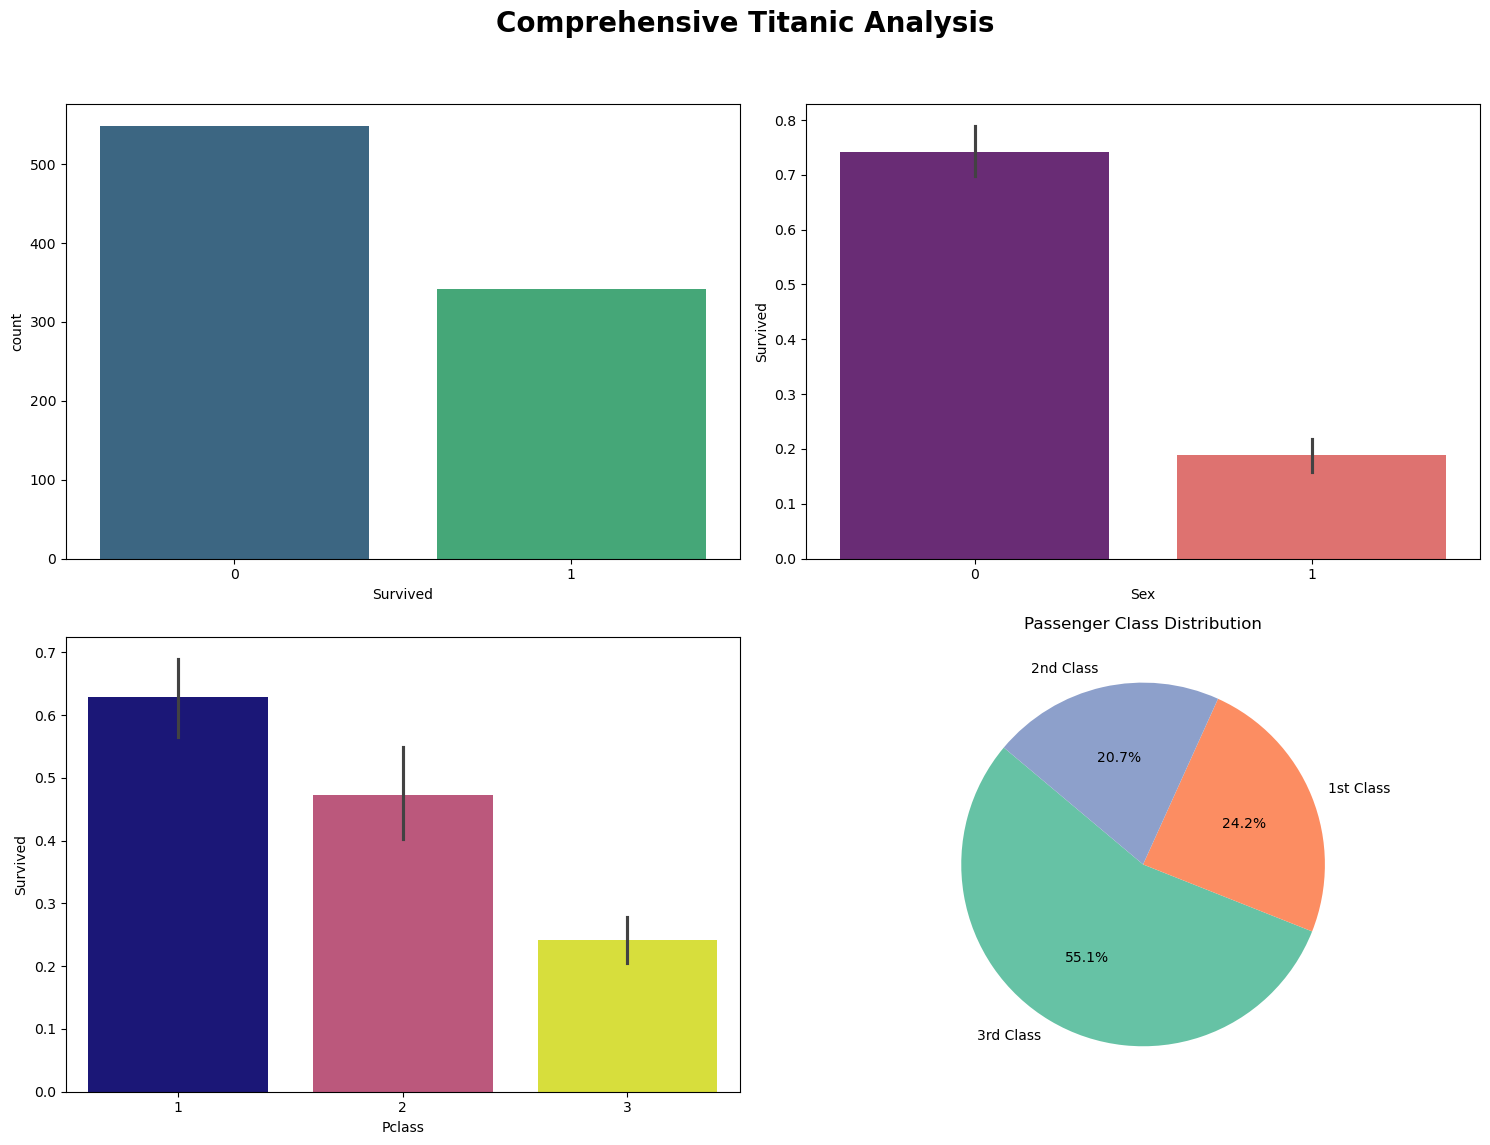

In [16]:
# 1. Change to 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive Titanic Analysis', fontsize=20, fontweight='bold')

# Plot 1 (Top Left)
sns.countplot(x='Survived', data=df, ax=axes[0, 0], palette='viridis', hue='Survived', legend=False)

# Plot 2 (Top Right)
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1], palette='magma', hue='Sex', legend=False)

# Plot 3 (Bottom Left)
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1, 0], palette='plasma', hue='Pclass', legend=False)

# Plot 4 (Bottom Right) - The Circle Chart
class_counts = df['Pclass'].value_counts()
axes[1, 1].pie(class_counts, labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
axes[1, 1].set_title('Passenger Class Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

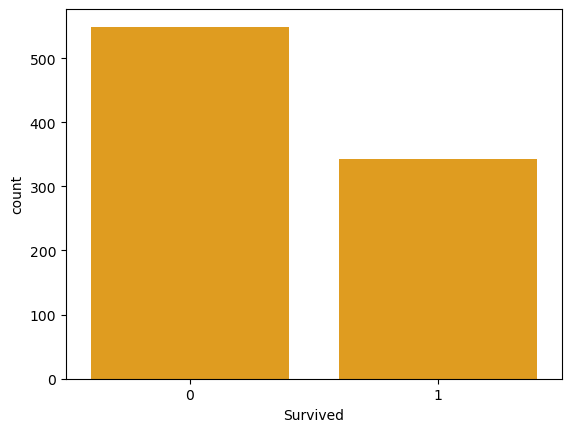

In [17]:
# Above This Next 3 cells have been get together.
sns.countplot(x=df['Survived'], color='orange')

<Axes: xlabel='Sex', ylabel='Survived'>

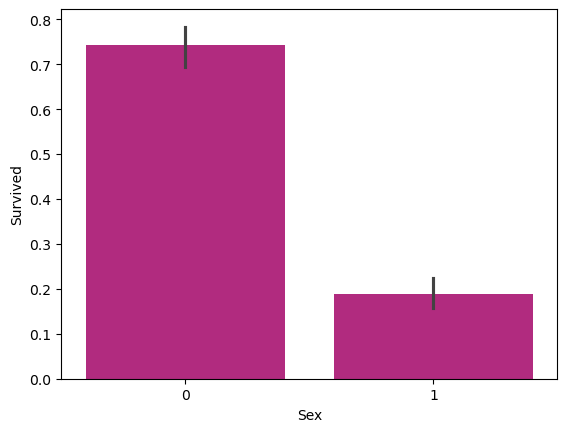

In [20]:
sns.barplot(x='Sex', y='Survived', data=df, color='#C71585')


C:\Users\saran\AppData\Local\Temp\ipykernel_24856\3176116984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Pclass', y='Survived', data=df, palette=['yellow','green','purple'])


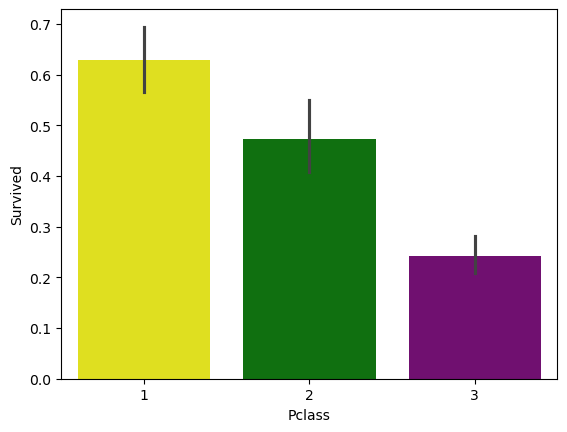

In [18]:
ax = sns.barplot(x='Pclass', y='Survived', data=df, palette=['yellow','green','purple'])
plt.show() # paleet helps in diff colour used.

<Axes: >

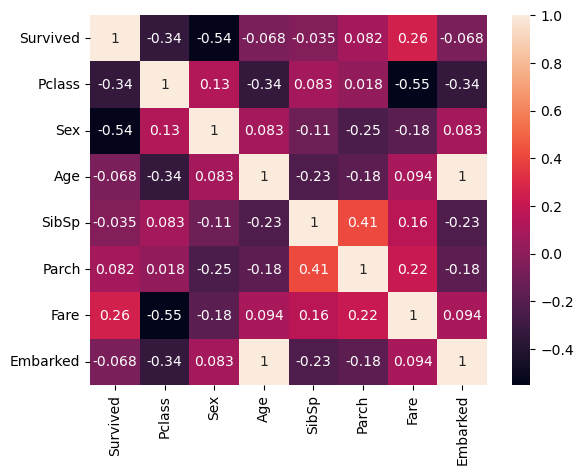

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True)



<Axes: xlabel='Survived', ylabel='count'>

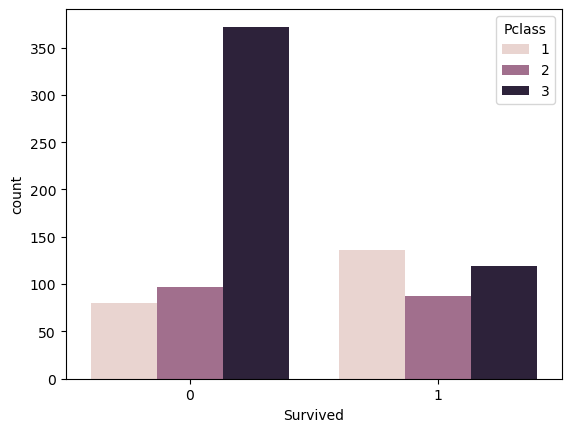

In [19]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [21]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

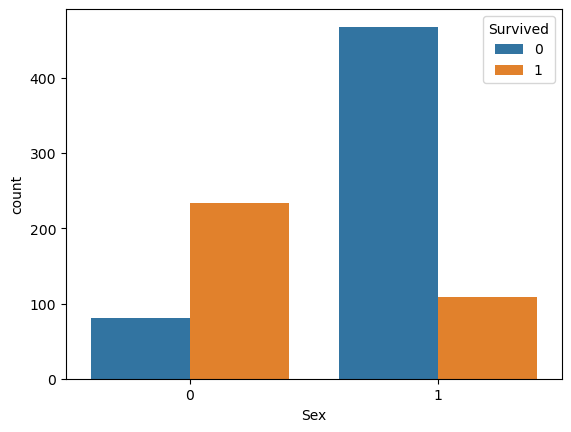

In [22]:
#Let's visualize the count of survivals wrt Gender
sns.countplot(x=df['Sex'],hue=df['Survived'])

Model Tranning


In [23]:
X=df[['Pclass','Sex']]
Y=df['Survived']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train,Y_train)


LogisticRegression(random_state=0)

In [52]:
model.score(X_train,Y_train)

0.8019662921348315

Model Predection


In [27]:
model=print(model.predict(X_test))


[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]


In [36]:
#Same done again
Y_pred_test=model.predict(X_test)
Y_pred_test

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [28]:
print(Y_test)

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


In [38]:
#import Metrics to check accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score:{0:0.4f}'.format(accuracy_score(Y_test,Y_pred_test)))


Model accuracy score:0.7821


In [53]:
import warnings
warnings.filterwarnings("ignore")

res=model.predict([[2,1]])

if(res==0):
    print("so sorry! Not survived")
else:
    print("Survived")


so sorry! Not survived


Model Evaluation